## Problem Statement
As we all know, Cristiano Ronaldo is a legend in the football world. He has played a thousand games and scored hundreds of goals. Now, given the dataset of Cristiano Ronaldo's "attempts" on the goal target, in all his recorded and unrecorded matches, predict if he has scored a goal or not. Formally, you are given a dataset of attempts taken by Ronaldo, predict if he scored a goal or not.

### Instruction
This dataset contains the records of all the attempts Ronaldo has taken. The column "is_goal" has a missing value for all the rows you need to predict the value of "is_goal". Extract the rows with missing "is_goal" value and submit your prediction as the probability [0.0 -1.0] of the goal scored.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
df.shape

(30697, 28)

In [5]:
df['shot_id_number'] = np.arange(len(df)) + 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           30697 non-null int64
lat/lng                  29132 non-nul

In [7]:
# Percentage of NA values in columns
df.isna().sum()

Unnamed: 0                   0
match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number               0
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

## Feature Engineering

In [8]:
# Replacing missing value of col A with value of col B
df['remaining_min'].fillna(df['remaining_min.1'], inplace=True)
df['type_of_shot'].fillna(df['type_of_combined_shot'], inplace=True)
df['power_of_shot'].fillna(df['power_of_shot.1'], inplace=True)
df['knockout_match'].fillna(df['knockout_match.1'], inplace=True)
df['remaining_sec'].fillna(df['remaining_sec.1'], inplace=True)
df['distance_of_shot'].fillna(df['distance_of_shot.1'], inplace=True)

# Dropping unnecessary cols
df = df.drop(['remaining_min.1', 'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1',
              'Unnamed: 0', 'match_id', 'team_id', 'match_event_id', 'team_name', 'home/away',
              'type_of_combined_shot', 'lat/lng', 'location_x', 'location_y',
              'game_season'], axis=1)

In [9]:
df['type_of_shot'] = df['type_of_shot'].str.extract('(\d+)').astype(int)

In [10]:
# Imputing NA with mean
df['remaining_min'].fillna((df['remaining_min'].mean()), inplace=True)
df['power_of_shot'].fillna((df['power_of_shot'].mode()[0]), inplace=True)
df['remaining_sec'].fillna((df['remaining_sec'].mean()), inplace=True)
df['distance_of_shot'].fillna((df['distance_of_shot'].mean()), inplace=True)
df['knockout_match'].fillna((df['knockout_match'].mean()), inplace=True)

In [11]:
df = df.dropna(subset=['area_of_shot', 'shot_basics', 'range_of_shot', 'date_of_game'])

In [12]:
df.isnull().sum()

remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             5113
area_of_shot           0
shot_basics            0
range_of_shot          0
date_of_game           0
shot_id_number         0
type_of_shot           0
dtype: int64

In [13]:
# One hot encoding of categorical variable
area_of_shot = pd.get_dummies(df['area_of_shot'])
shot_basics = pd.get_dummies(df['shot_basics'])
range_of_shot = pd.get_dummies(df['range_of_shot'])

In [14]:
# Concatinating after one hot encoding
df = pd.concat([df, area_of_shot, shot_basics, range_of_shot], axis=1)
df = df.drop(['area_of_shot', 'shot_basics', 'range_of_shot'], axis=1)

In [15]:
# Dropping NA from date_of_game
df = df.dropna(subset=['date_of_game'])
print("Shape after concatinating: {}".format(df.shape))

Shape after concatinating: (24969, 27)


In [16]:
# Standardization of Date 
data = pd.to_datetime(df['date_of_game'])
data = array(data).reshape(len(data), 1)
scaler_date = MinMaxScaler(feature_range=[0,1])
scaler_date = scaler_date.fit(data)
df['date_of_game'] = scaler_date.transform(data)

In [17]:
# Standardization of other numerical variables
numeric = df[['remaining_min', 'power_of_shot', 'remaining_sec', 'distance_of_shot', 'knockout_match', 'type_of_shot']]
scalar_num = MinMaxScaler(feature_range=[0,1])
scalar_num = scalar_num.fit(numeric)
df[['remaining_min', 'power_of_shot', 'remaining_sec', 'distance_of_shot', 'knockout_match', 'type_of_shot']] = scalar_num.transform(numeric)

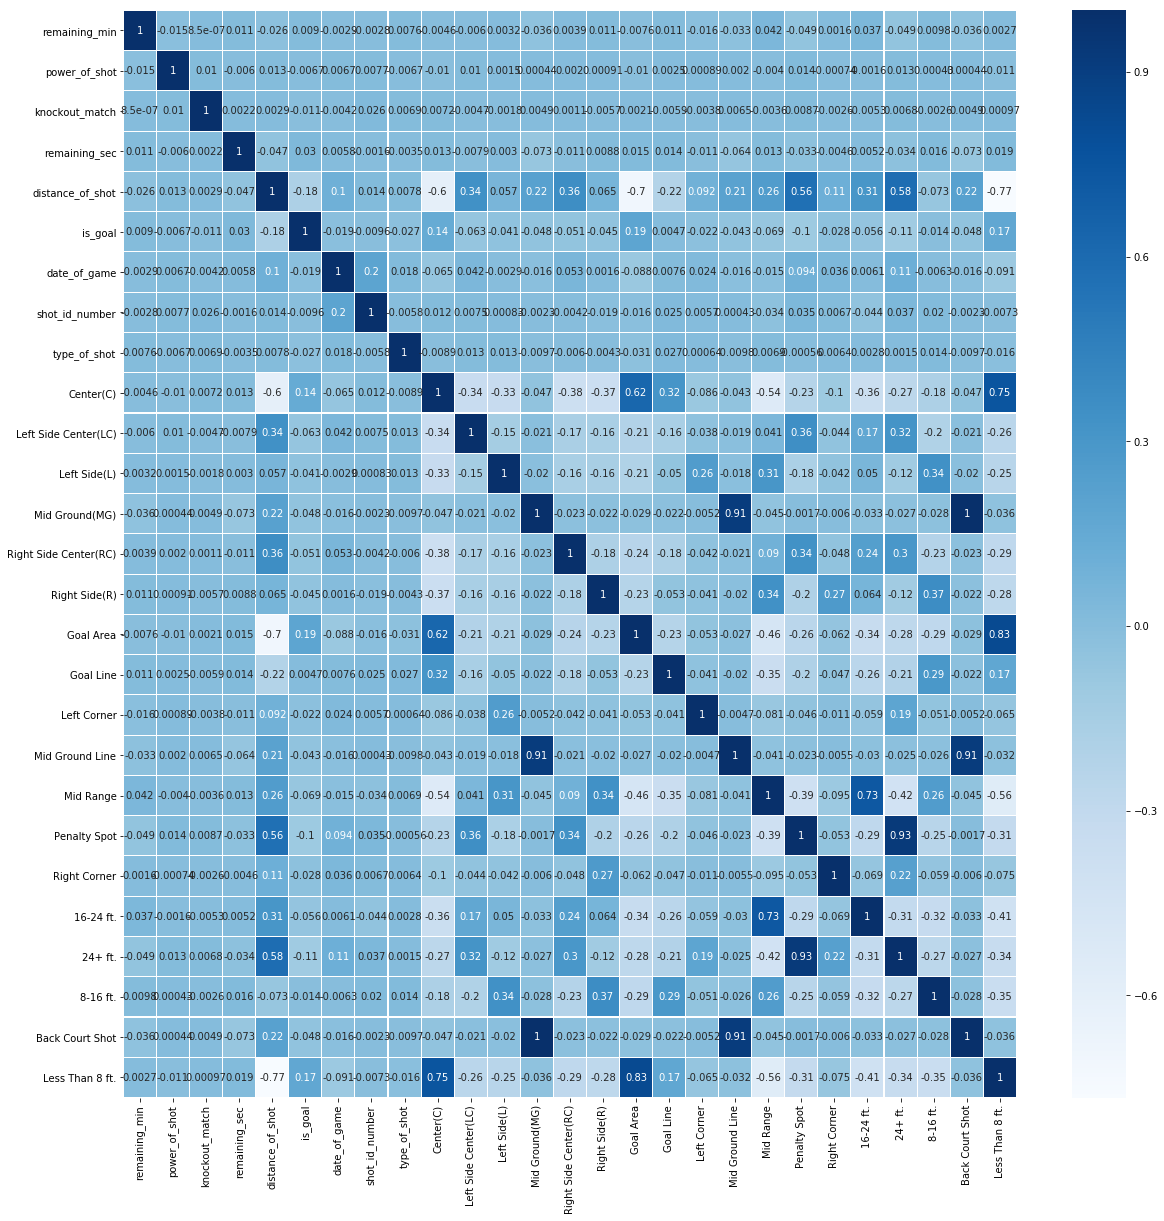

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True, cmap="Blues", ax=ax, linecolor='white', linewidths=0.1)

In [19]:
# Creating testing dataset
test = df[df['is_goal'] != 1.0]
test = test[test['is_goal'] != 0.0]
test.shape

(5113, 27)

In [20]:
# Creating training dataset
train = df.dropna(subset=['is_goal'])
train.shape

(19856, 27)

In [21]:
# Checking if splitting of test and train is done correctly
test.shape[0] + train.shape[0]

24969

## Model Building

In [22]:
X = train
X = X.drop(['is_goal', 'shot_id_number'], axis=1)
y = train['is_goal']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=42)

In [24]:
shot_id_number_col = test.shot_id_number
test = test.drop(columns=['is_goal', 'shot_id_number'])

In [25]:
test.shape

(5113, 25)

In [26]:
# Exhaustive search of parameters

#grid={"C":[0.001,0.01,0.1,1,10,100,1000],'multi_class':['multinomial', 'ovr'],
#      "penalty":["l2"], 'solver':['saga', 'sag'] }
# logreg_cv=GridSearchCV(logistic_regression,grid,cv=10)
# logreg_cv.fit(X_train,y_train)
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [112]:
# Fitting and predicting on train_set
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42, algorithm='SAMME')
logistic_regression = LogisticRegression(C=100)
model = logistic_regression.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

## Evaluation

In [113]:
MAE = metrics.mean_absolute_error(y_test, y_pred[:,1])
score = 1 / (1+MAE)
print('Mean Absolute Error: {}'.format(MAE))
print('Score: {}'.format(score))

Mean Absolute Error: 0.47087819620782817
Score: 0.6798659485048922


### Prediction on new data

In [29]:
# Prediction on test data
y_pred_new_data = model.predict_proba(test)

# Creating dataframe for submission
submission = pd.DataFrame({'shot_id_number': shot_id_number_col, 'is_goal': y_pred_new_data[:,1]}).reset_index()
submission = submission.drop(['index'], axis=1)

# Rounding probabilities to 1
submission['is_goal'] = submission['is_goal'].round(1)
submission.is_goal.unique()

array([0.3, 0.6, 0.4, 0.5, 0.7, 0. ])

In [30]:
# Exporting to CSV file
submission.to_csv('Submission.csv',index=False)